### Introduction to Unsupervised Learning

- Unsupervised Learning is a type of Machine learning to draw inferences from unlabelled datasets.
- Model tries to find relationship between data.
- Most common unsupervised learning method is clustering which is used for exploratory data analysis to find hidden patterns or grouping in data


###  Clustering applications:
- Automatically organizing the data
- Labeling data
- Understanding hidden structure of data
- News Cloustering for grouping similar news together
- Customer Segmentation
- Suggest social groups


### Distance or Similarity Functions:

- Minkowiski breed of distance calculation: 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">
<br>

- Manhatten (p=1)
<br> <br>
<h1><center> $ d(x,y) = \sum_{i=1}^n |x_i - y_i| $ </center></h1>
<br>
- Euclidean (p=2)
<br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4efcba672e6df32cc8eb7ce0863591806a6581b5">
<br>
- Cosine(Suitable for text data): <br>
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d"> 


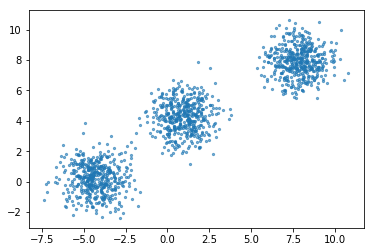

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

x,y = make_blobs(n_features=2, n_samples=1400, centers=3, cluster_std=1, random_state=3)
plt.scatter(x[:,0], x[:,1], s=5, alpha=.6)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

